In [197]:
#Importing modules for analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("seaborn")
%matplotlib inline

In [198]:
df = pd.read_csv("Heart.csv")

In [199]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [200]:
df.shape

(303, 14)

In [201]:
df.size

4242

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [203]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [204]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No null values, so our data is cleaned now let's visualize to take a deep look into the data and relationship between the features.

# Data visualization & Feature Selection

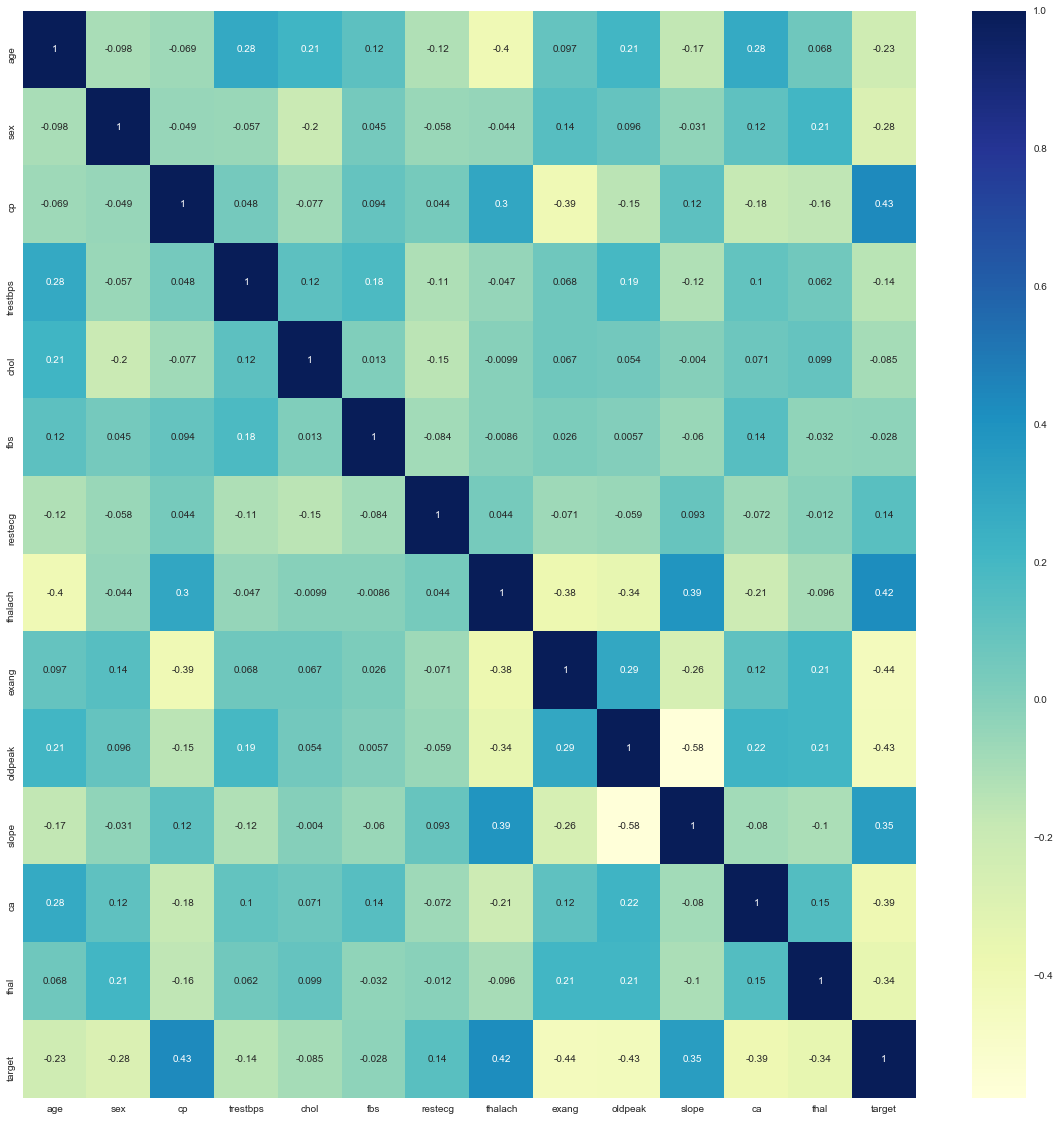

In [205]:
#Get correlation of each the features in dataset
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
#Plot heatmap
heat_map = sns.heatmap(df[top_corr_features].corr(),cmap="YlGnBu", annot = True, cbar = True)
plt.show()

C:\Users\Shhebu\N\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000047D8E1B348>,
      dtype=object)

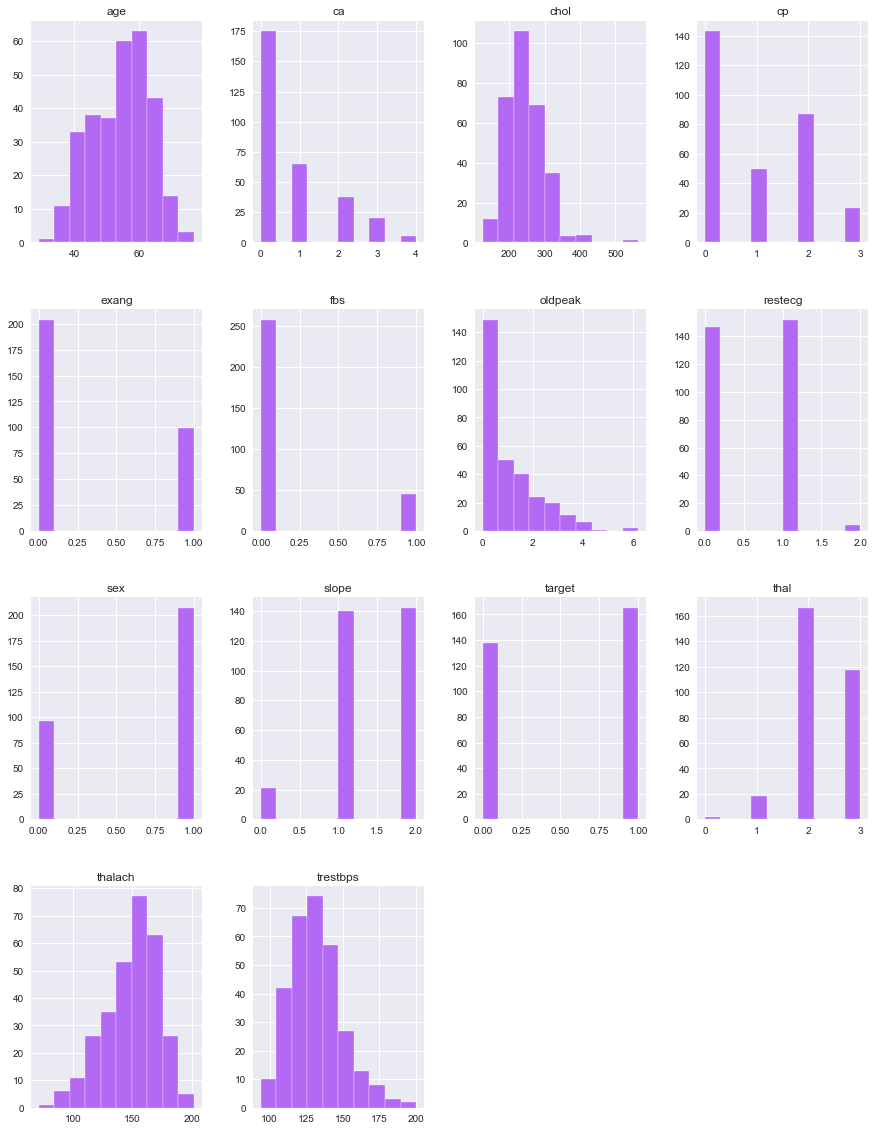

In [219]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax=ax,color = "#b469f5")

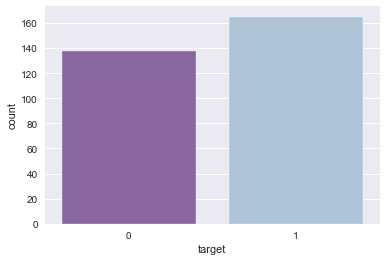

In [212]:
sns.countplot(x="target",data = df,palette="BuPu_r")

<Figure size 864x504 with 0 Axes>

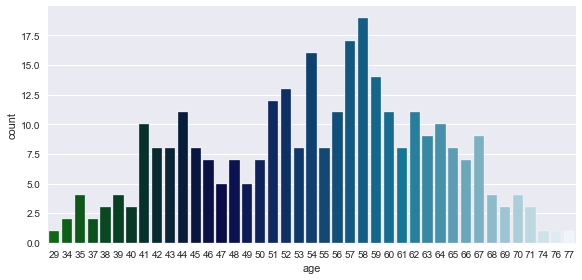

In [221]:
plt.figure(figsize=(12,7))
chart = sns.catplot(
    data=df,
    x='age',
    kind='count',
    palette='ocean',
    aspect=2,
    height=4)

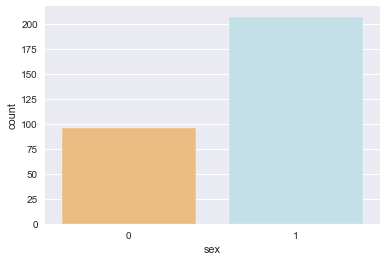

In [218]:
sns.countplot(x="sex",data = df,palette="RdYlBu")

# Data Processing

# Model Evaluation and Prediction

In [185]:
y = df["target"] 
X = df.drop("target", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [184]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((203, 13), (100, 13), (203,), (100,))

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
df = pd.get_dummies(df, columns = ["sex","cp","restecg","exang","slope","ca","thal"])

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StndScaler = StandardScaler()
column_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
df[column_to_scale] = StndScaler.fit_transform(df[column_to_scale])

In [142]:
df.head()

,age,trestbps,chol,fbs,thalach,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,1,0.015443,1.087338,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,0,1.633471,2.122573,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0,0.977514,0.310912,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,0,1.239897,-0.206705,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0,0.583939,-0.379244,1,1,0,1,...,1,1,0,0,0,0,0,0,1,0


In [143]:
y = df["target"]
X = df.drop("target", axis = 1)

## KNeighbour Classifier

In [145]:
from sklearn.model_selection import cross_val_score
knn_score = []
for k in range(1,21):
    knn_calssifier = KNeighborsClassifier(n_neighbors = k)
    score  = cross_val_score(knn_calssifier,X,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Clasifier scores for different k values')

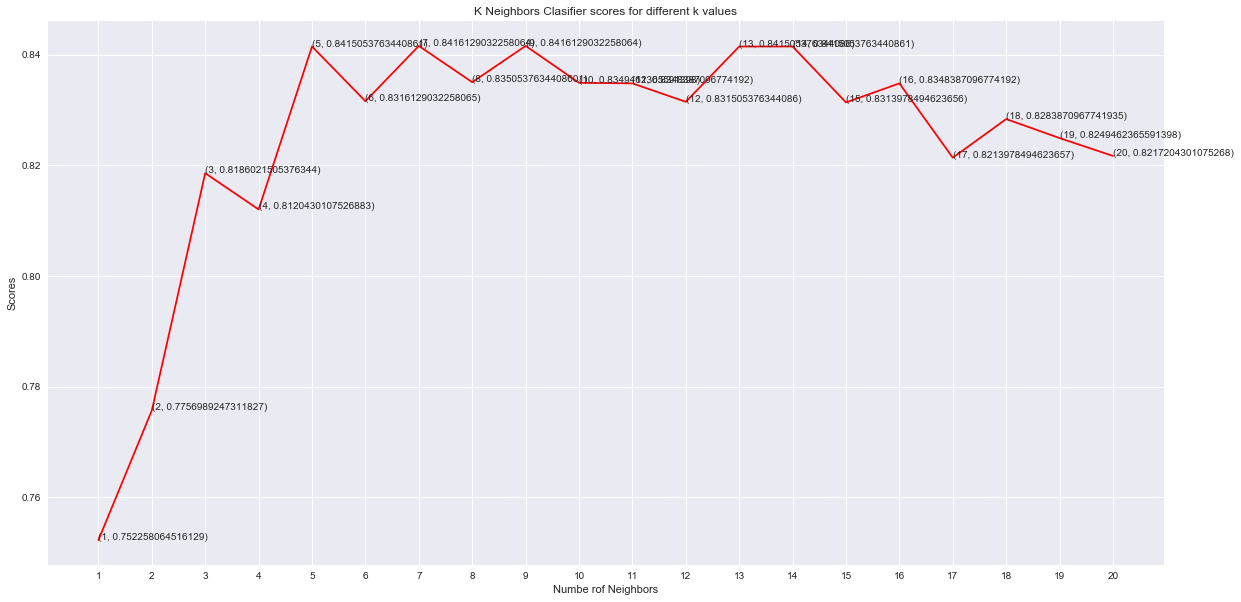

In [149]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,21)], knn_score, color = "red")
for i in range(1,21):
    plt.text(i,knn_score[i-1],(i,knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel("Numbe rof Neighbors")
plt.ylabel("Scores")
plt.title("K Neighbors Clasifier scores for different k values")

In [158]:
knn_calssifier = KNeighborsClassifier(n_neighbors = 12)
score  = cross_val_score(knn_calssifier,X,y,cv=10)

In [159]:
score.mean()

0.831505376344086

## Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
random_forest = RandomForestClassifier(n_estimators=10)
score  = cross_val_score(random_forest,X,y,cv=10)

In [171]:
score.mean()

0.8349462365591398

## Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
Trees = DecisionTreeClassifier()

In [175]:
score  = cross_val_score(Trees,X,y,cv=10)

In [176]:
score.mean()

0.7420430107526881

## Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [177]:
lg.fit(X_train,y_train)

C:\Users\Shhebu\N\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
score  = cross_val_score(lg,X,y,cv=10)

In [173]:
score.mean()

0.8511827956989247

Prediction and Graphical interpretation of Logistic Regression. 

In [24]:
Predicted_y = lg.predict(X_test)

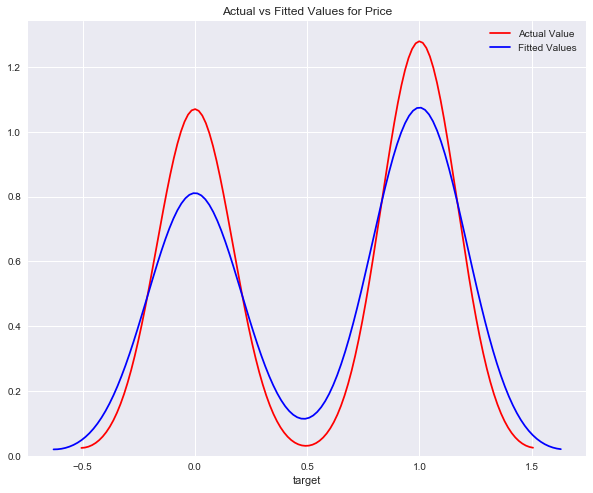

In [26]:
plt.figure(figsize=(10, 8))


ax1 = sns.distplot(df['target'], hist=False, color="r", label="Actual Value")
sns.distplot(Predicted_y, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()